In [15]:
import os
import csv
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [11]:
lines = []
dir_data = "data_uda"

with open(os.path.join(os.getcwd(), dir_data, "driving_log.csv")) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines = lines[1:]

images = []
measurements = []
for line in lines:
    source_path = os.path.split(line[0])[-1]
    current_path = os.path.join(os.getcwd(), dir_data, "IMG", source_path)
    image = cv2.imread(current_path)
    #g_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

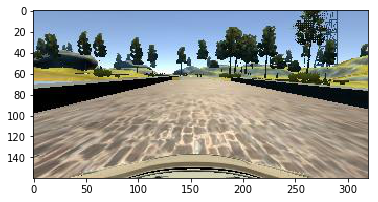

In [57]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.show()

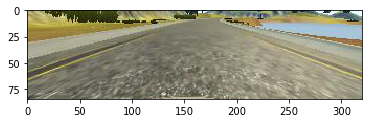

In [73]:
plt.imshow(cv2.cvtColor(images[1300][55:140,:], cv2.COLOR_BGR2RGB))
plt.show()

In [59]:
images[0].shape

(160, 320, 3)

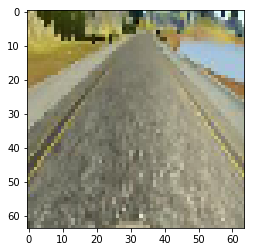

In [74]:
plt.imshow(cv2.cvtColor(cv2.resize(images[1300][55:140,:], (64,64)), cv2.COLOR_BGR2RGB))
plt.show()

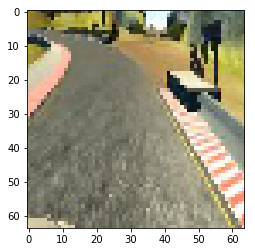

In [95]:
line = lines[2]
source_path = os.path.split(line[2])[-1]
current_path = os.path.join(os.getcwd(), dir_data, "IMG", source_path)
image = cv2.imread(current_path)
plt.imshow(cv2.cvtColor(cv2.resize(image[55:140,:], (64,64)), cv2.COLOR_BGR2RGB))
plt.show()

In [94]:
current_path

'/home/keigo/Documents/CarND-Behavioral-Cloning-P3/data/IMG/left_2016_12_01_13_31_12_937.jpg'

In [75]:
lines = []
dir_data = "data"

with open(os.path.join(os.getcwd(), dir_data, "driving_log.csv")) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines = lines[1:]

images = []
measurements = []
for line in lines:
    source_path = os.path.split(line[0])[-1]
    current_path = os.path.join(os.getcwd(), dir_data, "IMG", source_path)
    image = cv2.imread(current_path)
    #g_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

/home/keigo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


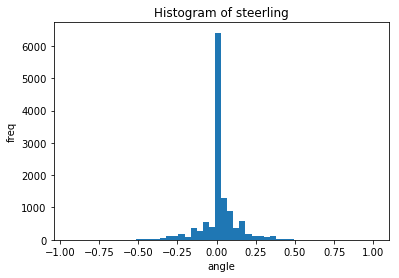

In [81]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(measurements, bins=50)
ax.set_title('Histogram of steerling')
ax.set_xlabel('angle')
ax.set_ylabel('freq')
fig.show()

In [80]:
np.bincount(measurements)

array([12437,     2])